In [1]:
import numpy as np
import pandas as pd

import plotly.offline as pyo
import plotly.express as px

pyo.init_notebook_mode()

filenames = ['data/freq_24.4_processed.csv']

In [2]:
data = []

# Read data files.
for filename in filenames:
    file = pd.read_csv(filename)
    data.append(file[1:])

In [4]:
data

[       Unnamed: 0       time     x_val     y_val  frequency
 1               1   0.001012 -0.007670 -0.000361       24.4
 2               2   0.001968 -0.001673 -0.000361       24.4
 3               3   0.002508  0.007322 -0.000361       24.4
 4               4   0.002869  0.019316 -0.002364       24.4
 5               5   0.010384  0.028312 -0.002364       24.4
 ...           ...        ...       ...       ...        ...
 42443       42443  59.995821 -0.061644  0.166619       24.4
 42444       42444  59.996235  0.055299  0.118544       24.4
 42445       42445  59.996638 -0.076636  0.737505       24.4
 42446       42446  59.996881 -0.268541  0.983887       24.4
 42447       42447  60.001621 -0.343504  1.001915       24.3
 
 [42447 rows x 5 columns]]

In [47]:
data_freqs = []
freqs = np.arange(0, 60, 0.1)

for i in freqs:
    div_idx = data[0].index[round(data[0]['time']) == round(i)]
    data_freqs.append(data[0][div_idx[0]:div_idx[-1]])

In [44]:
len(data_freqs)

6000

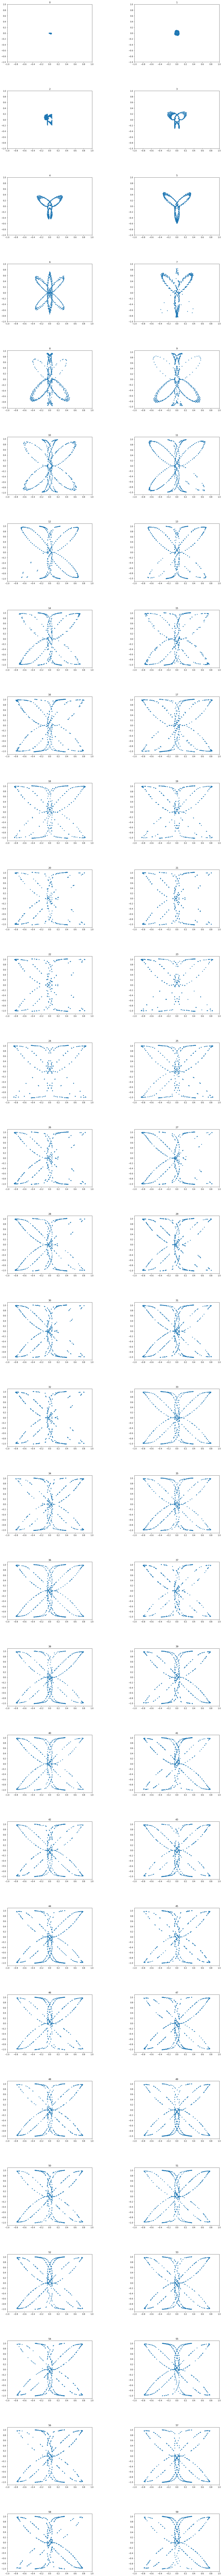

In [32]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure()

fig.set_figheight(500)
fig.set_figwidth(20)

spec = gridspec.GridSpec(
    ncols=2, 
    nrows=60, 
    wspace=0.5,  
    hspace=0.5, 
)

for i in range(len(data_freqs)):
    ax = fig.add_subplot(spec[i])
    ax.plot(data_freqs[i]['x_val'], data_freqs[i]['y_val'], '.')
    ax.set_yticks(np.arange(-1, 1 + 0.1, 0.2))
    ax.set_xticks(np.arange(-1, 1 + 0.1, 0.2))
    ax.title.set_text(str(round(freqs[i], 1)))

plt.show()

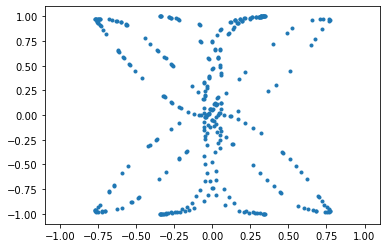

In [49]:
import matplotlib.animation as animation
from IPython.display import HTML
from math import floor

fig, ax = plt.subplots()

line, = ax.plot([-1, 0, 1], [1, 0, -1], '.')

def animate(i):
    line.set_xdata(data_freqs[i]['x_val'])
    line.set_ydata(data_freqs[i]['y_val'])
    return line,

ani = animation.FuncAnimation(fig, animate, interval=10, blit=True, frames=600)

HTML(ani.to_html5_video())

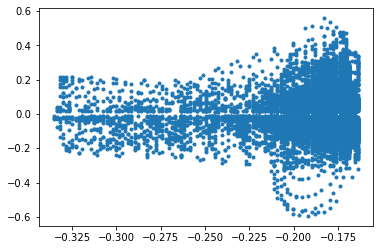

In [34]:
plt.plot(data[0]['x_val'], data[0]['y_val'], '.')